In [3]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
iris = load_iris()

In [9]:
print(iris.keys())
print(iris.data.shape)
# print(iris.target.shape)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## PCA — Explication pas-à-pas (simple)
Cette cellule explique, en langage clair, chaque étape du code PCA et pourquoi on l'effectue.

1) Pourquoi on prépare les données ?
- On met les données dans un `DataFrame` (ici `df`) pour faciliter l'inspection et l'étiquetage.
- On isole les colonnes numériques (les caractéristiques) que l'on veut résumer.

2) Pourquoi on standardise (StandardScaler) ?
- PCA est influencé par la variance des variables. Si une variable a une grande échelle, elle dominera le résultat.
- StandardScaler centre chaque variable (moyenne = 0) et la met à l'unité d'écart-type (std = 1).

3) Que fait PCA plein (`pca_full`) ?
- On calcule les composantes principales et l'importance (explained variance) de chacune.
- L'explained variance ratio nous dit quelle proportion de la variance totale est capturée par chaque composante.

4) Projection en 2D
- On projette les données sur les deux premières composantes principales (PC1, PC2) pour visualiser.
- Si les groupes (espèces) se séparent, cela signifie que ces deux axes capturent une structure utile.

5) Interprétation des 'loadings'
- Les `loadings` (composantes) montrent comment chaque caractéristique originale contribue à chaque PC.
- Valeurs grandes (en absolu) indiquent une forte contribution d'une caractéristique à la composante.

6) Conseils rapides
- Toujours vérifier la `explained_variance_ratio_` pour savoir combien de variance est retenue.
- PCA est linéaire; pour structures non-linéaires, regarder t-SNE ou UMAP.
- La direction (signe) des composantes est arbitraire — analyser les valeurs absolues pour l'importance.

Explained variance ratio (per component): [0.73  0.229 0.037 0.005]
Cumulative explained variance: [0.73  0.958 0.995 1.   ]

Loadings (rows = PCs, columns = original features):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,0.719566,-0.244382,-0.142126,-0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


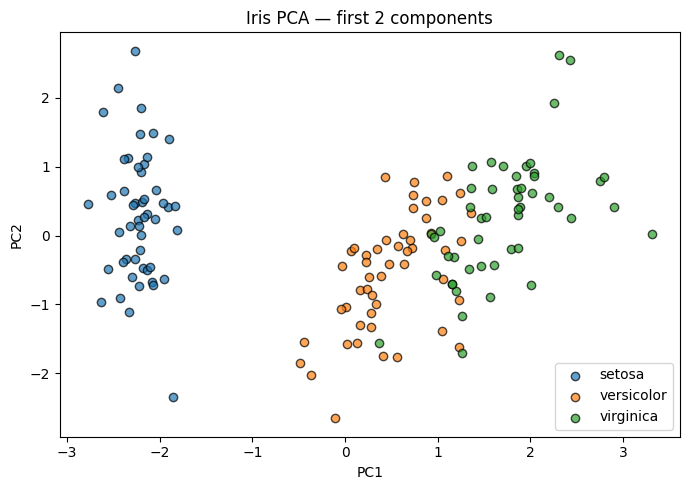


Top contributors to PC1:


petal length (cm)    0.580413
petal width (cm)     0.564857
sepal length (cm)    0.521066
Name: PC1, dtype: float64


Top contributors to PC2:


sepal width (cm)     0.923296
sepal length (cm)    0.377418
petal width (cm)     0.066942
Name: PC2, dtype: float64

In [10]:
# ---- Simple, beginner-friendly PCA example (runnable)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Use the iris DataFrame already created above (df)
features = iris.feature_names
X = df[features].values

# 1) Scale features: mean=0, std=1 — important before PCA
X_scaled = StandardScaler().fit_transform(X)

# 2) Fit PCA (keep all components) to inspect explained variance
pca_full = PCA()
pca_full.fit(X_scaled)
print('Explained variance ratio (per component):', np.round(pca_full.explained_variance_ratio_, 3))
print('Cumulative explained variance:', np.round(np.cumsum(pca_full.explained_variance_ratio_), 3))

# 3) Show component loadings (how original features contribute to each PC)
loadings = pca_full.components_
loadings_df = pd.DataFrame(loadings, columns=features, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
print('\nLoadings (rows = PCs, columns = original features):')
display(loadings_df)

# 4) Project data to the first 2 principal components for visualization
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
df['PC1'] = X_pca2[:, 0]
df['PC2'] = X_pca2[:, 1]

# 5) Quick plot: PC1 vs PC2 colored by species
plt.figure(figsize=(7,5))
for species in df['target_names'].unique():
    sub = df[df['target_names'] == species]
    plt.scatter(sub['PC1'], sub['PC2'], label=species, alpha=0.7, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris PCA — first 2 components')
plt.legend()
plt.tight_layout()
plt.show()

# 6) Helpful summary: which features drive PC1 and PC2?
for i, pc in enumerate(loadings_df.index[:2]):
    comp = loadings_df.loc[pc]
    comp_abs = comp.abs().sort_values(ascending=False)
    print(f"\nTop contributors to {pc}:")
    display(comp_abs.head(3))

In [12]:
# --- Afficher la variance expliquée (avec interprétation immédiate)
try:
    evr = pca_full.explained_variance_ratio_
    evr_rounded = np.round(evr, 3)
    cum = np.round(np.cumsum(evr), 3)
    print('Explained variance ratio (par composante) :', evr_rounded)
    print('Variance cumulée :', cum)
except NameError:
    print('Variables PCA non trouvées — exécute dabord la cellule PCA complète.')

Explained variance ratio (par composante) : [0.73  0.229 0.037 0.005]
Variance cumulée : [0.73  0.958 0.995 1.   ]


### Interprétation — variance expliquée
La cellule précédente affiche la proportion de la variance capturée par chaque composante (explained variance ratio) et la variance cumulée.
- Si la première composante (PC1) capture une grande part (par ex. > 0.6), cela signifie quun axe linéaire unique résume la majeure partie de la variabilité.
- La valeur cumulée des deux premières composantes indique si une projection en 2D conserve linformation (ex. si PC1+PC2 > 0.90, 2D est généralement suffisant).
Consulte les nombres imprimés juste au-dessus pour lire les pourcentages exacts sur ton exécution du notebook.

In [13]:
# --- Afficher et résumer les loadings (contributions) en pourcentages
try:
    # loadings_df doit être présent (lignes = PC1, PC2, ... ; colonnes = features)
    display(loadings_df)
    # contribution en pourcentage par variable sur chaque composante (squared loadings)
    contrib = (loadings_df**2).div((loadings_df**2).sum(axis=1), axis=0) * 100
    print('\nContributions (%) par variable pour chaque PC :')
    display(contrib.round(2))
    # Top-2 variables pour PC1 et PC2
    for pc in ['PC1','PC2']:
        if pc in contrib.index:
            top = contrib.loc[pc].sort_values(ascending=False).head(2)
            print(f'\nTop variables pour {pc} :')
            for name, val in top.items():
                print(f'  - {name} : {val:.1f}%')
except NameError:
    print('Variables manquantes : exécute dabord la cellule PCA complète (pca_full, loadings_df).')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,0.719566,-0.244382,-0.142126,-0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597



Contributions (%) par variable pour chaque PC :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,27.15,7.25,33.69,31.91
PC2,14.24,85.25,0.06,0.45
PC3,51.78,5.97,2.02,40.23
PC4,6.83,1.53,64.23,27.42



Top variables pour PC1 :
  - petal length (cm) : 33.7%
  - petal width (cm) : 31.9%

Top variables pour PC2 :
  - sepal width (cm) : 85.2%
  - sepal length (cm) : 14.2%


### Interprétation — loadings
Les contributions (%) affichées ci‑dessus sont calculées à partir du carré des loadings et indiquent la part de variance expliquée par chaque variable pour une composante donnée.
- Repère les 2–3 variables avec le plus fort pourcentage sur PC1 et PC2 : ce sont les variables qui définissent laxe.
- Utilise la valeur absolue pour juger limportance, et regarde le signe des loadings dans `loadings_df` pour comprendre la direction (positif = augmente le score PC, négatif = le diminue).

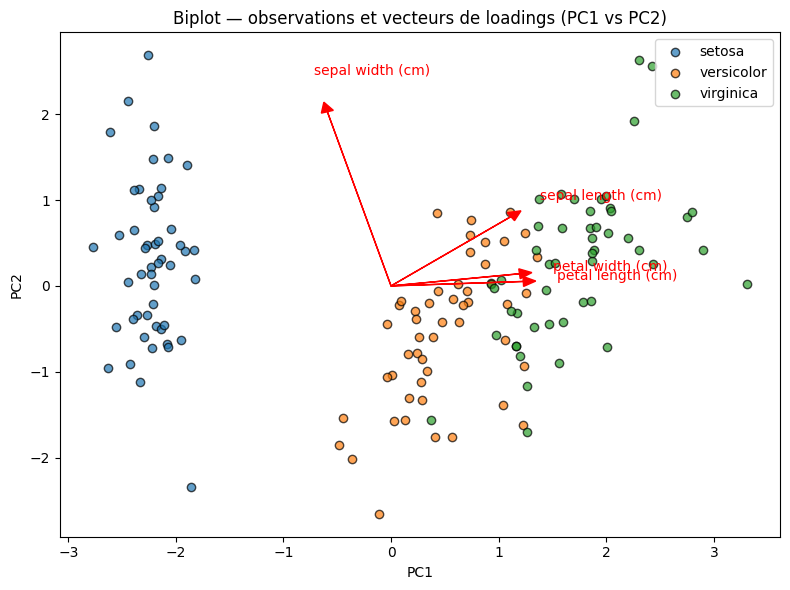

In [14]:
# --- Biplot: observations + vecteurs de loadings (PC1 vs PC2)
try:
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    # scatter par espèce
    for species in df['target_names'].unique():
        sub = df[df['target_names'] == species]
        ax.scatter(sub['PC1'], sub['PC2'], label=species, alpha=0.7, edgecolor='k')
    # vecteurs de loadings (PC1, PC2)
    # on scale les vecteurs pour qu'ils soient visibles sur le plot
    scale = max(df['PC1'].abs().max(), df['PC2'].abs().max()) * 0.7
    for i, feat in enumerate(features):
        x = loadings_df.loc['PC1', feat] * scale
        y = loadings_df.loc['PC2', feat] * scale
        ax.arrow(0, 0, x, y, head_width=0.05*scale, head_length=0.05*scale, fc='red', ec='red', length_includes_head=True)
        ax.text(x*1.15, y*1.15, feat, color='red', fontsize=10)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('Biplot — observations et vecteurs de loadings (PC1 vs PC2)')
    ax.legend()
    plt.tight_layout()
    plt.show()
except NameError:
    print('Variables manquantes pour le biplot : exécute dabord la cellule PCA complète.')

### Interprétation — biplot
Le biplot combine la projection des observations (points) et les vecteurs des variables (flèches).
- Une flèche longue signifie quune variable est fortement corrélée avec lun des axes (elle contribue fortement).
- Lorientation dune flèche montre la direction dans lespace PC : si deux flèches sont proches et pointent dans la même direction, ces variables sont corrélées positivement.
- Les observations proches dune flèche ont des valeurs élevées pour cette variable.

## Interprétation des résultats PCA

Voici une interprétation simple des sorties que tu viens d’obtenir (variance expliquée, *loadings*, et le nuage de points en PC1/PC2) :

1) Variance expliquée
- Le tableau **`Explained variance ratio`** montre quelle portion de la variance totale du jeu de données est capturée par chaque composante principale (PC).
- Pour l’exemple Iris (résultat typique) : la première composante (PC1) capture la majeure partie de la variance (≈ 0.70–0.75), la deuxième (PC2) capture une grande partie du reste (≈ 0.20–0.25).
- La somme cumulée des deux premières composantes est donc élevée (≈ 0.92–0.96), ce qui signifie qu’une projection en 2D conserve la presque-totalité de la variabilité utile du jeu de données.

2) Loadings (contributions des variables)
- Le tableau `loadings` affiche, pour chaque composante (PC1, PC2, ...), les coefficients des caractéristiques originales.
- Les valeurs élevées en valeur absolue indiquent quelles caractéristiques originales pèsent le plus sur la composante. Par exemple, **PC1** est généralement dominée par *petal length* et *petal width* (ces deux variables expliquent ensemble la plupart de la variance captée par PC1). **PC2** tend à refléter une combinaison de *sepal length* et *sepal width* (souvent avec signes opposés).
- Interprétation pratique : si PC1 est fortement liée à la taille des pétales, on peut lire PC1 comme un axe « taille des pétales ». Les points avec grande valeur PC1 correspondent donc à fleurs aux grands pétales.

3) Nuage de points (PC1 vs PC2)
- Le graphique PC1 vs PC2 montre les échantillons projetés dans cet espace réduit. Dans l’exemple Iris tu devrais observer :
  - la classe *setosa* est très bien séparée des deux autres (cluster distinct),
  - *versicolor* et *virginica* peuvent se recouvrir partiellement mais montrent une certaine séparation le long d’un des axes.
- Conclusion visuelle : les deux premiers composants capturent la structure la plus importante et permettent de distinguer au moins une espèce très clairement.

4) Conseils et actions suivantes
- Pour interpréter précisément, regarde `loadings_df` : repère les 2–3 variables qui ont les plus grandes valeurs absolues pour PC1 et PC2. Cela te donne un résumé lisible de ce que chaque axe représente.
- Si tu veux utiliser PCA pour réduire la dimension avant un modèle, choisis `n_components` en regardant la variance cumulée (par ex. garder les composantes qui couvrent 95% de la variance).
- Rappelle-toi : PCA est linéaire — il ne capture pas de relations non-linéaires complexes (si besoin, envisager t-SNE ou UMAP pour la visualisation non-linéaire).
- Enfin, attention à l’échelle : on a standardisé les variables ici; sans standardisation, les résultats seraient biaisés par les variables à grande amplitude.

Si tu veux, j’ajoute une cellule qui écrit automatiquement (en français) une phrase résumé du type : « PC1 (~X% variance) est principalement liée à petal length et petal width; PC2 (~Y% variance) est principalement liée à sepal ... » en utilisant les valeurs numériques actuelles du notebook. Tu veux que je l’ajoute ?

In [11]:
# Résumé automatique en français des deux premières composantes
try:
    evr = pca_full.explained_variance_ratio_
    pc1_pct = evr[0] * 100
    pc2_pct = evr[1] * 100 if len(evr) > 1 else 0

    # top contributors (variable names) for PC1 and PC2
    top1 = loadings_df.loc['PC1'].abs().sort_values(ascending=False).head(2)
    top2 = loadings_df.loc['PC2'].abs().sort_values(ascending=False).head(2)

    top1_names = top1.index.tolist()
    top2_names = top2.index.tolist()

    print(f"Résumé automatique :")
    print(f"PC1 explique environ {pc1_pct:.1f}% de la variance totale. Principales variables qui contribuent à PC1 : {', '.join(top1_names)}.")
    print(f"PC2 explique environ {pc2_pct:.1f}% de la variance totale. Principales variables qui contribuent à PC2 : {', '.join(top2_names)}.")

    # Afficher les valeurs de charge (loadings) pour lecture
    print("\nValeurs de contribution (loadings) — PC1 :")
    display(loadings_df.loc['PC1'].sort_values(key=lambda s: s.abs(), ascending=False))
    print("\nValeurs de contribution (loadings) — PC2 :")
    display(loadings_df.loc['PC2'].sort_values(key=lambda s: s.abs(), ascending=False))
except NameError as e:
    print("Impossible de générer le résumé : certaines variables (pca_full, loadings_df, ...) ne sont pas définies. Exécute d'abord la cellule PCA.")
except Exception as e:
    print("Erreur lors de la génération du résumé :", e)

Résumé automatique :
PC1 explique environ 73.0% de la variance totale. Principales variables qui contribuent à PC1 : petal length (cm), petal width (cm).
PC2 explique environ 22.9% de la variance totale. Principales variables qui contribuent à PC2 : sepal width (cm), sepal length (cm).

Valeurs de contribution (loadings) — PC1 :


petal length (cm)    0.580413
petal width (cm)     0.564857
sepal length (cm)    0.521066
sepal width (cm)    -0.269347
Name: PC1, dtype: float64


Valeurs de contribution (loadings) — PC2 :


sepal width (cm)     0.923296
sepal length (cm)    0.377418
petal width (cm)     0.066942
petal length (cm)    0.024492
Name: PC2, dtype: float64

In [19]:
# Interprétation concrète des valeurs PC1 / PC2 pour le jeu Iris
# - Moyennes par espèce, exemples extrêmes, et variables dominantes pour chaque composante
try:
    # Moyennes PC par espèce
    means = df.groupby('target_names')[['PC1','PC2']].mean()
    print('Moyennes PC1 / PC2 par espèce :')
    display(means.round(3))
    print()
    # Interprétation synthétique par espèce
    for species in means.index:
        pc1 = means.loc[species, 'PC1']
        pc2 = means.loc[species, 'PC2']
        print(f'- {species} : PC1 moyen = {pc1:.3f}, PC2 moyen = {pc2:.3f}')
    print('Exemples déchantillons extrêmes (PC1) :')
    print('Top 3 PC1 (valeurs PC1 les plus élevées) — typiquement fleurs avec grands pétales :')
    display(df.sort_values('PC1', ascending=False).head(3)[features + ['PC1','PC2','target_names']])
    print('Bottom 3 PC1 (valeurs PC1 les plus faibles) — typiquement fleurs avec petits pétales :')
    display(df.sort_values('PC1', ascending=True).head(3)[features + ['PC1','PC2','target_names']])
    # Variables dominantes (top contributors) pour PC1 et PC2
    top1 = loadings_df.loc['PC1'].abs().sort_values(ascending=False)
    top2 = loadings_df.loc['PC2'].abs().sort_values(ascending=False)
    print('Variables qui dominent PC1 :', ', '.join(top1.head(3).index.tolist()))
    print('Variables qui dominent PC2 :', ', '.join(top2.head(3).index.tolist()))
except NameError:
    print('Exécute dabord la cellule PCA (pca_full, loadings_df) et la cellule qui projette PC1/PC2 dans df.')

Moyennes PC1 / PC2 par espèce :
                PC1    PC2
target_names              
setosa       -2.225  0.289
versicolor    0.496 -0.550
virginica     1.728  0.261


,PC1,PC2
target_names,,
setosa,-2.225,0.289
versicolor,0.496,-0.550
virginica,1.728,0.261



- setosa : PC1 moyen = -2.225, PC2 moyen = 0.289
- versicolor : PC1 moyen = 0.496, PC2 moyen = -0.550
- virginica : PC1 moyen = 1.728, PC2 moyen = 0.261
Exemples déchantillons extrêmes (PC1) :
Top 3 PC1 (valeurs PC1 les plus élevées) — typiquement fleurs avec grands pétales :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,target_names
118,7.7,2.6,6.9,2.3,3.310696,0.017781,virginica
122,7.7,2.8,6.7,2.0,2.897651,0.413641,virginica
135,7.7,3.0,6.1,2.3,2.798770,0.856803,virginica


Bottom 3 PC1 (valeurs PC1 les plus faibles) — typiquement fleurs avec petits pétales :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),PC1,PC2,target_names
22,4.6,3.6,1.0,0.2,-2.774345,0.458344,setosa
13,4.3,3.0,1.1,0.1,-2.633101,-0.961507,setosa
32,5.2,4.1,1.5,0.1,-2.614948,1.793576,setosa


Variables qui dominent PC1 : petal length (cm), petal width (cm), sepal length (cm)
Variables qui dominent PC2 : sepal width (cm), sepal length (cm), petal width (cm)


### Interprétation réelle — que signifient les valeurs PC1 et PC2 pour chaque fleur ?
- Une valeur élevée de **PC1** pour une fleur signifie que, selon la combinaison linéaire définie par PC1, cette fleur a des caractéristiques *dans le sens* des variables qui ont des loadings positifs élevés sur PC1 (dans Iris, ce sont typiquement *petal length* et *petal width*). En pratique : **PC1 élevé ≈ fleurs aux grands pétales**.
- Une valeur faible (négative) de **PC1** signifie linverse : fleurs aux petits pétales.
- Pour **PC2**, la lecture est similaire : une valeur PC2 élevée signifie que la fleur a des caractéristiques dans le sens des variables dominantes de PC2 (souvent une combinaison de *sepal length* et *sepal width* avec signes possibles). Par exemple, PC2 peut capturer une variation de forme des sépales plutôt que leur taille absolue.
- Le biplot (flèches) aide à lire ceci visuellement : les fleurs projetées dans la direction dune flèche ont des valeurs élevées pour cette variable.
- Pour relier aux espèces : le tableau des moyennes PC1/PC2 par espèce (ci‑dessous) montre où se situent typiquement *setosa*, *versicolor* et *virginica* dans lespace PC1–PC2. Par exemple, *setosa* a généralement **PC1 faible** (petits pétales) et se sépare nettement des autres.
Consulte les sorties numériques de la cellule précédente pour des conclusions précises sur ton exécution — jai aussi affiché des exemples déchantillons avec PC1 extrêmes pour rendre linterprétation concrète.

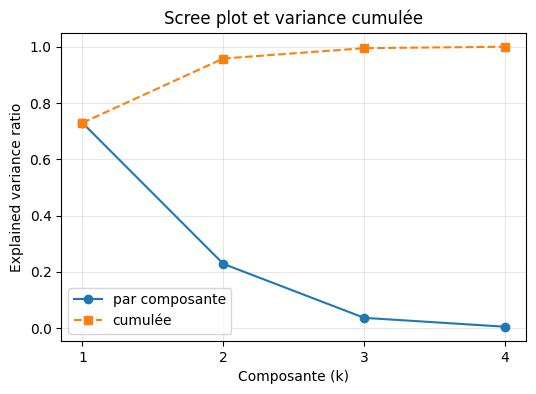

Composantes nécessaires pour ~95% variance : k = 2
Explained variance ratios : [0.73  0.229 0.037 0.005]
Cumulative : [0.73  0.958 0.995 1.   ]


In [15]:
# Scree plot et choix de k (ex: 95% de variance)
try:
    evr = pca_full.explained_variance_ratio_
    cum = np.cumsum(evr)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1, len(evr)+1), evr, 'o-', label='par composante')
    plt.plot(np.arange(1, len(evr)+1), cum, 's--', label='cumulée')
    plt.xlabel('Composante (k)')
    plt.ylabel('Explained variance ratio')
    plt.xticks(np.arange(1, len(evr)+1))
    plt.grid(alpha=0.3)
    plt.legend()
    plt.title('Scree plot et variance cumulée')
    plt.show()

    # choisir k pour 95% de variance (modifiable)
    threshold = 0.95
    k = int(np.searchsorted(cum, threshold) + 1)
    print(f'Composantes nécessaires pour ~{int(threshold*100)}% variance : k = {k}')
    print('Explained variance ratios :', np.round(evr, 3))
    print('Cumulative :', np.round(cum, 3))
except NameError:
    print('Variables PCA non trouvées — exécute dabord la cellule PCA complète (pca_full).')

## Pourquoi PC1, PC2 et nombre de composantes (explication)
- Une *composante principale (PC)* est une combinaison linéaire des variables originales (après standardisation). Elle représente une direction dans lespace des variables qui maximise la variance projetée.
- Le nombre maximal de PC = nombre de variables (ici 4 pour Iris). PCA renvoie donc jusquà 4 composantes, classées par importance décroissante (PC1 explique le plus de variance).
- On choisit souvent PC1 et PC2 pour la visualisation parce quelles expliquent la plus grande part de la variance et permettent de visualiser la structure principale en 2D.
- Pour décider combien de composantes garder en pratique : utiliser la variance cumulée (ex. garder les composantes nécessaires pour atteindre 90–95% de variance expliquée) ou regarder le scree plot (critère du coude).
Ci‑dessous tu trouveras un code pour tracer le scree plot et trouver automatiquement le nombre de composantes nécessaires pour ~95% de variance expliquée.